Day 1 Choose a dataset from online sources like kaggle

Dataset chosen : Marketing campaign dataset.csv 

Day 2 Explore the dataset and compute basic statistics

In [1]:
# Importing all necessary libraries
import pandas as pd
import IPython.display as display
import seaborn as sns
import warnings
import matplotlib.pyplot as plt

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72612 entries, 0 to 72611
Data columns (total 35 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   campaign_item_id     72612 non-null  int64  
 1   no_of_days           72612 non-null  int64  
 2   time                 72612 non-null  object 
 3   ext_service_id       72612 non-null  int64  
 4   ext_service_name     72612 non-null  object 
 5   creative_id          72612 non-null  int64  
 6   creative_width       69200 non-null  float64
 7   creative_height      69200 non-null  float64
 8   search_tags          72612 non-null  object 
 9   template_id          69200 non-null  float64
 10  landing_page         72612 non-null  object 
 11  advertiser_id        72612 non-null  int64  
 12  advertiser_name      72612 non-null  object 
 13  network_id           72612 non-null  int64  
 14  approved_budget      72206 non-null  float64
 15  advertiser_currency  72612 non-null 

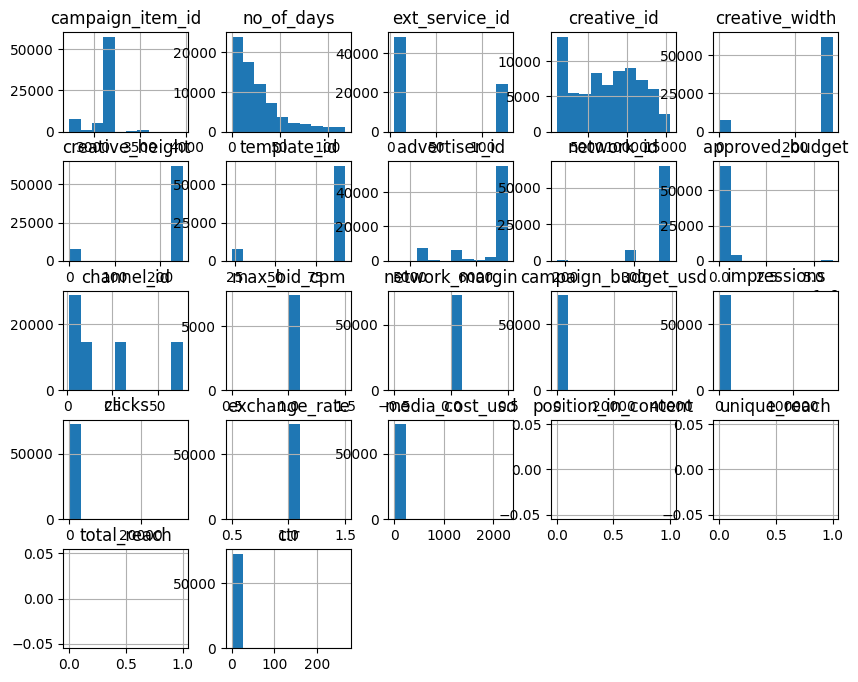

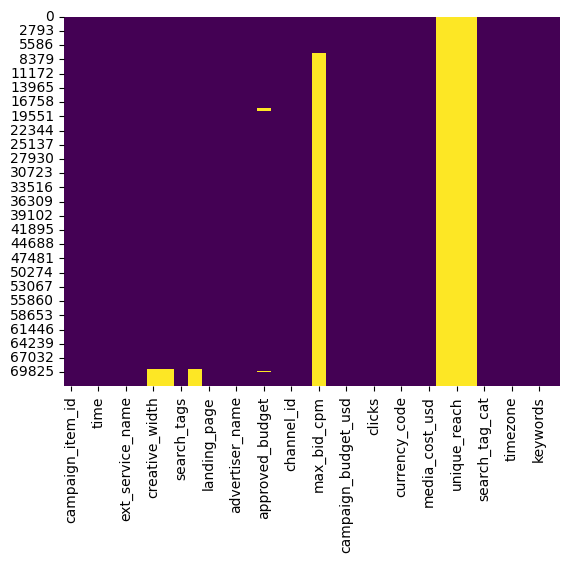

(72612, 2)


In [63]:
# Loading the CSV File
df=pd.read_csv('Marketing campaign dataset.csv')

# Checking the first few rows of dataset
df.head()
# print(df.head())

# Gathering basic information about the dataset
df.info()
print(df[['impressions', 'clicks']].shape)
# Summary Statistics(mean,median,std,min,max)
df.describe()

# Identifying Missing Values : Checking for missing values in each column
df.isnull().sum()

# CTR
df['ctr']=(df['clicks']/df['impressions'])*100

# Plotting Histogram for numberical columns
import matplotlib.pyplot as plt
df.hist(figsize=(10, 8))
plt.show()


# Plotting Missing values using a heatmap
import seaborn as sns
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
plt.show()

print(df[['impressions', 'clicks']].shape)


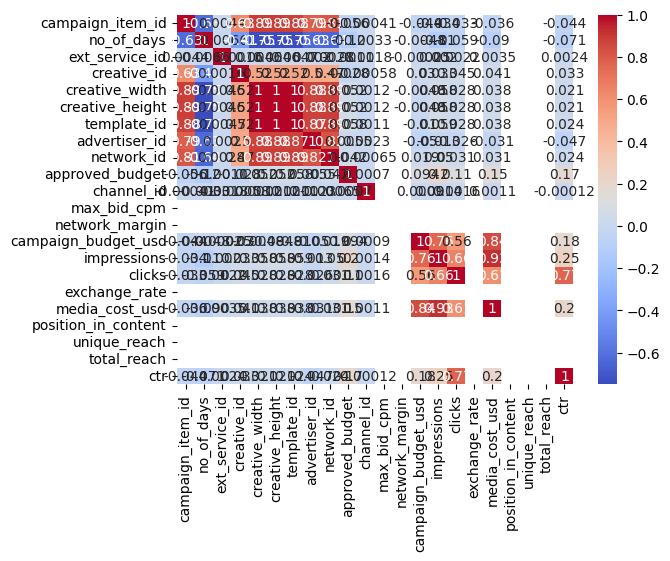

(72612, 2)


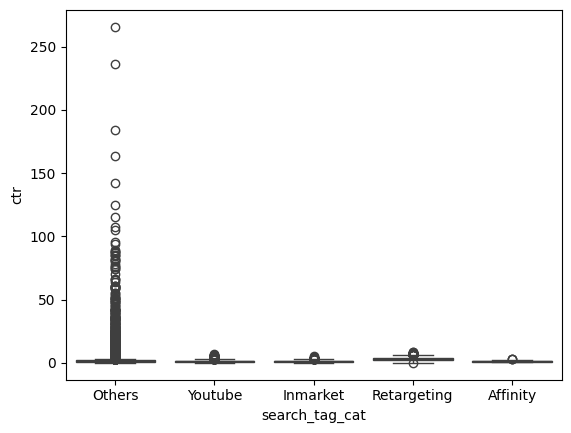

(72612, 2)


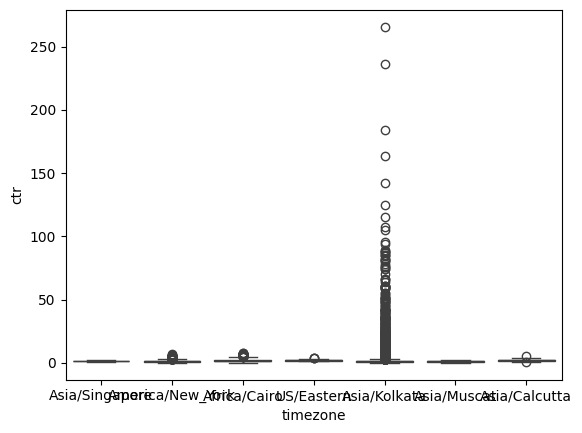

(72612, 2)


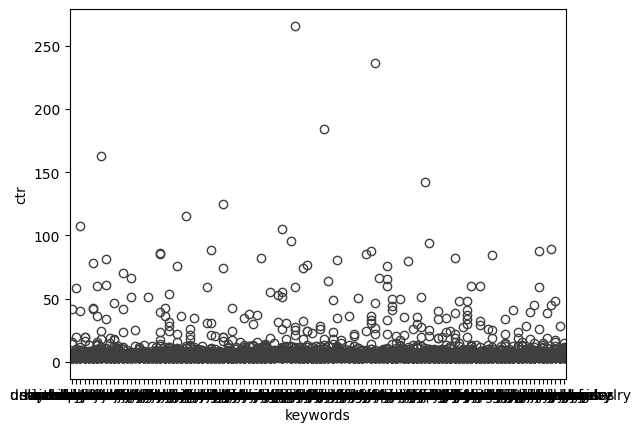

(72612, 2)


In [25]:
# Correlation Matrix : Compute relations between numerical features
correlation_matrix = df.corr(numeric_only=True)
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.show()
print(df[['impressions', 'clicks']].shape)


# Plot CTR against features like ad_type,user_device and time_of_day
sns.boxplot(x='search_tag_cat', y='ctr', data=df)
plt.show()
print(df[['impressions', 'clicks']].shape)

sns.boxplot(x='timezone', y='ctr', data=df)
plt.show()
print(df[['impressions', 'clicks']].shape)

sns.boxplot(x='keywords', y='ctr', data=df)
plt.show()
print(df[['impressions', 'clicks']].shape)


Day 4 Handle Missing Values and Address Outliers

In [53]:
# Apply IQR-based filtering
data = df[(df['ctr'] >= lower_bound) & (df['ctr'] <= upper_bound)].copy()

# Check shape before and after filtering
print(f"Rows before outlier removal: {df.shape[0]}")
print(f"Rows after outlier removal: {df.shape[0]}")
# If missing values are minimal drop them
df.dropna(inplace=True)

# For the CTR you can handle outliers using IQR
Q1 = df['ctr'].quantile(0.25)
Q3 = df['ctr'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 3 * IQR
upper_bound = Q3 + 3 * IQR

# Scale numeric features like impressions,clicks
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
data[['impressions', 'clicks']] = data[['impressions', 'clicks']].apply(pd.to_numeric, errors='coerce')
data[['impressions', 'clicks']] = scaler.fit_transform(data[['impressions', 'clicks']])


Rows before outlier removal: 72612
Rows after outlier removal: 72612


Day 5 Clean the Dataset and Prepare for feature engineering

In [67]:
# Remove Duplicates
df.drop_duplicates(inplace=True)
data = pd.get_dummies(df, columns=['ad_type', 'user_device', 'time_of_day'], drop_first=True)
from sklearn.ensemble import RandomForestRegressor


KeyError: "None of [Index(['ad_type', 'user_device', 'time_of_day'], dtype='object')] are in the [columns]"